# Apply Python on Housing Prices Data

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [5]:
# To-do: Replace ‘Housing.csv‘ with the actual file path of your Housing dataset.
housing_data = pd.read_csv('/Users/signerssin/Downloads/Housing.csv')
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Basic Analysis

In [6]:
# Use .shape to get the number of rows and columns
rows, columns = housing_data.shape
print("Number of rows:", rows)
print("Number of columns:", columns)

Number of rows: 545
Number of columns: 13


In [4]:
# Use .dtypes to get the data types of each column
data_types = housing_data.dtypes
print(data_types)

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [5]:
# Use .describe() to get basic statistics for numerical columns
basic_stats = housing_data[['price', 'area']].describe()
print(basic_stats)

              price          area
count  5.450000e+02    545.000000
mean   4.766729e+06   5150.541284
std    1.870440e+06   2170.141023
min    1.750000e+06   1650.000000
25%    3.430000e+06   3600.000000
50%    4.340000e+06   4600.000000
75%    5.740000e+06   6360.000000
max    1.330000e+07  16200.000000


## Create subsets

In [16]:
# Subset for houses with more than 3 bedrooms
houses_more_than_3_bedrooms = housing_data[housing_data['bedrooms'] > 3]

# To-do: Houses with prices over $10 million
houses_more_than_10_M = housing_data[housing_data['price'] > 10000000]

# Define a threshold for 'large area' 
large_area_threshold = 5000  # Example threshold, you can change this threshold if you want

# To-do: Creating a subset for houses with a 'large area' based on the defined threshold
houses_over_threshold = housing_data[housing_data['area'] > large_area_threshold]

## Histogram

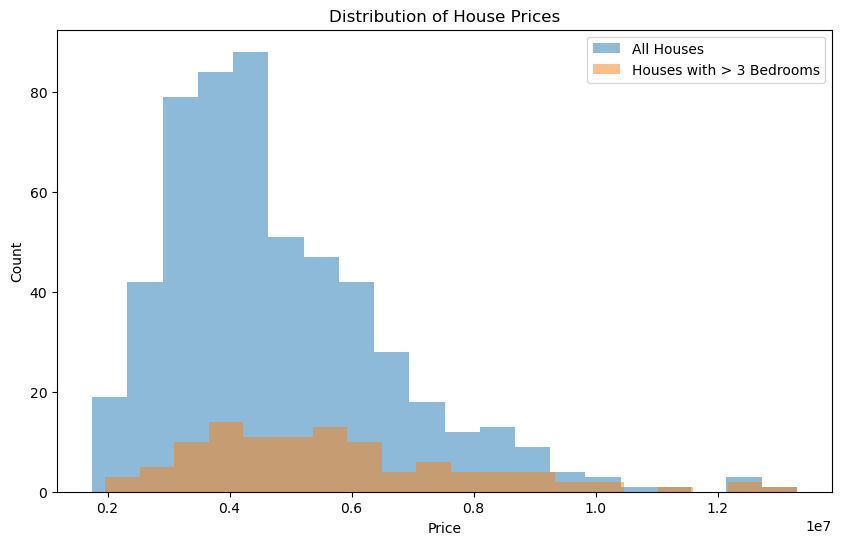

In [7]:
# Histogram of house prices
plt.figure(figsize=(10,6))  # Sets the figure size to be 10 inches wide and 6 inches tall.
plt.hist(housing_data['price'], bins=20, alpha=0.5, label='All Houses')
plt.hist(houses_more_than_3_bedrooms['price'], bins=20, alpha=0.5, label='Houses with > 3 Bedrooms')
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of House Prices')
plt.legend()
plt.show()

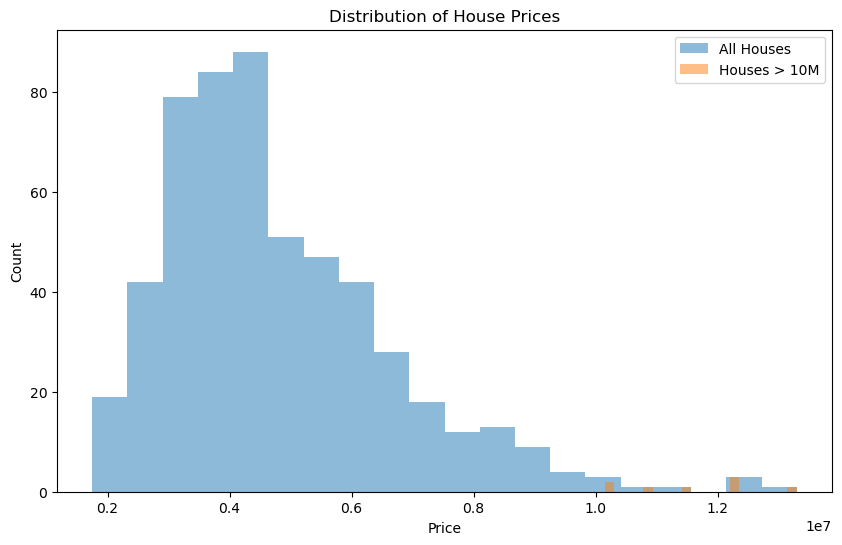

In [11]:
# To-do: Plot the histograms for both the entire dataset and the subset of houses priced above $10 million
plt.figure(figsize=(10,6))  # Sets the figure size to be 10 inches wide and 6 inches tall.
plt.hist(housing_data['price'], bins=20, alpha=0.5, label='All Houses')
plt.hist(houses_more_than_10_M['price'], bins=20, alpha=0.5, label='Houses > 10M')
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of House Prices')
plt.legend()
plt.show()

## Scatter Plot

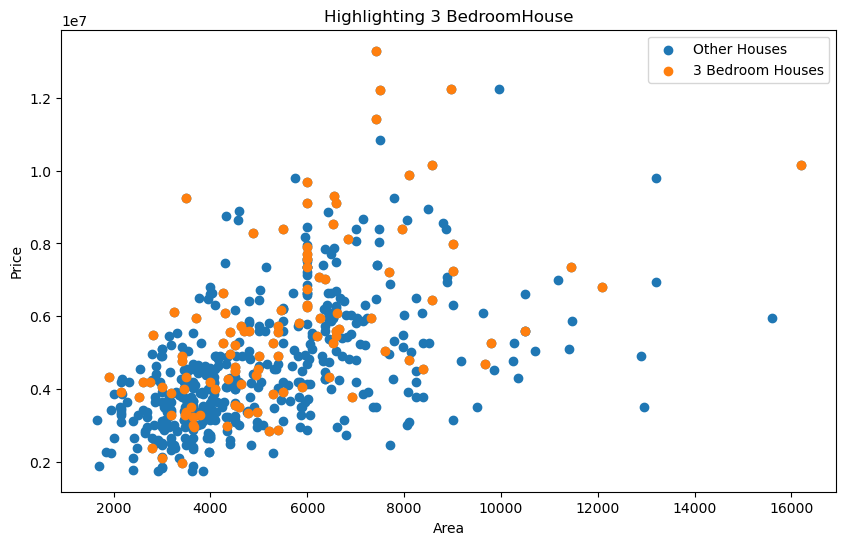

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(housing_data['area'], housing_data['price'], label='Other Houses')
plt.scatter(houses_more_than_3_bedrooms['area'], houses_more_than_3_bedrooms['price'], label='3 Bedroom Houses')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Highlighting 3 BedroomHouse')
plt.legend()
plt.show()

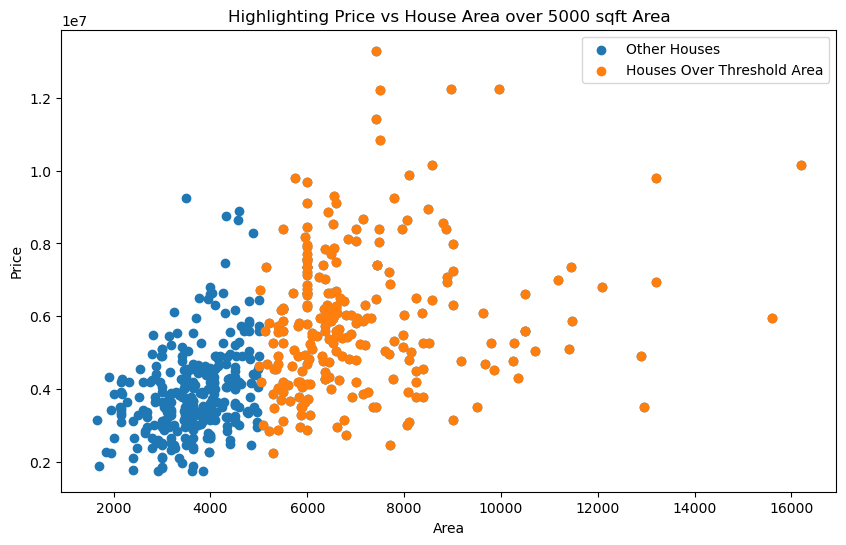

In [17]:
# To-do: Scatter plot of price vs houses with a 'large area' you defined above
plt. figure(figsize=(10,6))
plt. scatter(housing_data['area'], housing_data['price'], label='Other Houses')
plt. scatter(houses_over_threshold['area'], houses_over_threshold['price'], label='Houses Over Threshold Area')
plt. xlabel('Area')
plt.ylabel('Price')
plt.title('Highlighting Price vs House Area over 5000 sqft Area')
plt.legend()
plt.show()

## Mean and Standard Deviation

In [9]:
# Calculating mean and standard deviation for the entire dataset
overall_mean_price = housing_data['price'].mean()
overall_std_price = housing_data['price'].std()
overall_mean_area = housing_data['area'].mean()
overall_std_area = housing_data['area'].std()
print("Overall Mean Price:", overall_mean_price)
print("Overall Standard Deviation in Price:", overall_std_price)

Overall Mean Price: 4766729.247706422
Overall Standard Deviation in Price: 1870439.615657394


In [19]:
# To-do: Calculating for a subset of your choice, e.g. houses with more than 3 bedrooms etc.
overall_mean_price_of_more_than_3bedroom_house = round(houses_more_than_3_bedrooms['price'].mean())

overall_mean_area_of_more_than_3bedroom_house = round(houses_more_than_3_bedrooms['area'].mean())

print("Overall Mean Price of House > 3 bedrooms:", overall_mean_price_of_more_than_3bedroom_house)
print("Overall Mean Area of House > 3 bedrooms:", overall_mean_area_of_more_than_3bedroom_house)

Overall Mean Price of House > 3 bedrooms: 5720636
Overall Mean Area of House > 3 bedrooms: 5618


## 3D Plot

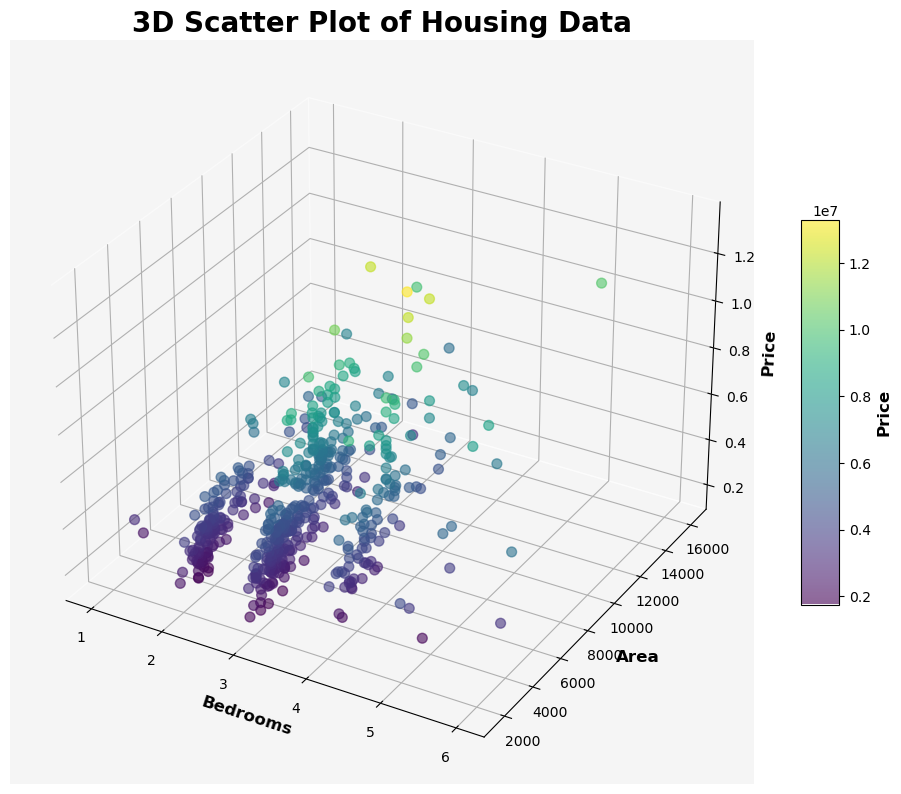

In [10]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')  # Add a 3D subplot

# Scatter plot for 'bedrooms', 'area', and 'price'
# Using the 'price' as the color reference for the color map
sc = ax.scatter(housing_data['bedrooms'], housing_data['area'], housing_data['price'], c=housing_data['price'], marker='o', s=50, alpha=0.6, cmap='viridis')

# Setting the labels for each axis
ax.set_xlabel('Bedrooms', fontweight='bold', fontsize=12)
ax.set_ylabel('Area', fontweight='bold', fontsize=12)
ax.set_zlabel('Price', fontweight='bold', fontsize=12)

# Setting the title
ax.set_title('3D Scatter Plot of Housing Data', fontweight='bold', fontsize=20)

# Customizing the grid
ax.grid(True)  # Show grid
ax.xaxis.pane.fill = ax.yaxis.pane.fill = ax.zaxis.pane.fill = False  # Make panes transparent
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

# Sets the background color behind the plot
ax.set_facecolor('whitesmoke')  

# Customizing the ticks for better readability
ax.tick_params(axis='both', which='major', labelsize=10)

# Adding a color bar which maps values to colors
cbar = plt.colorbar(sc, ax=ax, shrink=0.5, aspect=10)
cbar.set_label('Price', fontweight='bold', fontsize=12)

plt.show()


## Learning Activity:
This activity is about familiarizing yourself with 3D plots and starting to think about how you can interpret complex data visually. Feel free to explore and form your own impressions.

Observe how the number of bedrooms and the area of the houses relate to the price. Does it seem like more bedrooms or a larger area tend to lead to a higher price? Or is the relationship not so straightforward?

Notice how the color reflects the price and see if you can spot any trends or patterns.

#### <span style="color:red;"> Remember to include your plots (histogram + 2D scatter plot) in your Tutorial Completion Document (your PDF file), and submit this completed .ipynb file with your Tutorial Completion Document.</span>